# Wstęp do sztucznych sieci neuronowych

## **Jak działa sieć neuronowa?**

### **Wstęp:**
Sieci neuronowe to modele matematyczne inspirowane biologicznym układem nerwowym. Są one podstawowym narzędziem w uczeniu maszynowym, szczególnie w zadaniach takich jak klasyfikacja, regresja, rozpoznawanie obrazów czy przetwarzanie języka naturalnego.

### **Podstawowe elementy sieci neuronowej:**

1. **Neuron (Perceptron):**
   - **Model matematyczny:** Neuron wykonuje operację na zbiorze wejść $( x_1, x_2, \dots, x_n )$ oraz odpowiadających im wagach $( w_1, w_2, \dots, w_n )$.
   ![](https://upload.wikimedia.org/wikipedia/commons/8/8c/Perceptron_moj.png)
   - **Funkcja działania:**  
     $
     z = \sum_{i=1}^n w_i x_i + b
     $
     gdzie:
     - $( z )$: suma ważona wejść,
     - $( b )$: wartość biasu (przesunięcie),
     - $( w_i )$: waga przypisana wejściu $( x_i )$.
   - **Funkcja aktywacji:** Przekształca $( z )$ na wynik wyjściowy $( a )$. Przykłady funkcji aktywacji:
     - Sigmoid: $( \sigma(z) = \frac{1}{1 + e^{-z}} )$
     </br>
     ![](https://media.licdn.com/dms/image/v2/D4D12AQGIXdSG7IJCNw/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1694183259537?e=2147483647&v=beta&t=lJ_qEzot0iGYhNpez9XGRNHjS-CDKHn3Wj-6iCQxRO0)
     - ReLU: $( f(z) = \max(0, z) )$ </br>
     ![](https://www.nomidl.com/wp-content/uploads/2022/04/image-10.png)

2. **Warstwa:**
   - **Warstwa wejściowa:** Otrzymuje dane wejściowe.
   - **Warstwa ukryta:** Przetwarza dane wejściowe za pomocą neuronów. Może mieć wiele warstw.
   - **Warstwa wyjściowa:** Zwraca wynik (np. klasyfikacja na podstawie funkcji softmax).

3. **Struktura sieci:**
   - **Płytkie sieci neuronowe:** Mają niewiele warstw ukrytych.
   - **Głębokie sieci neuronowe (Deep Learning):** Zawierają wiele warstw ukrytych i są używane do złożonych problemów.

### **Proces uczenia sieci neuronowej:**

1. **Przekazanie danych przez sieć (Feedforward):**
   - Dane wejściowe przechodzą przez warstwy sieci neuronowej, aż osiągną warstwę wyjściową.
   - Każdy neuron w warstwach ukrytych wykonuje obliczenia: suma ważona wejść → funkcja aktywacji → wynik wyjściowy.

2. **Obliczenie straty (Loss):**
   - Wynik sieci jest porównywany z prawdziwą wartością za pomocą funkcji straty.
   - Przykłady funkcji straty:
     - MSE (Mean Squared Error): $( \text{Loss} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 )$
     - Entropia krzyżowa (dla klasyfikacji):  
       $
       \text{Loss} = -\frac{1}{n} \sum_{i=1}^n y_i \log(\hat{y}_i)
       $

3. **Propagacja wsteczna (Backpropagation):**
   - Sieć neuronowa oblicza gradient funkcji straty względem wag i biasów, by dowiedzieć się, jak zmieniać parametry, aby zmniejszyć stratę.
   - Wykorzystuje regułę łańcuchową do rozprzestrzenienia błędu od warstwy wyjściowej do warstw wcześniejszych.

4. **Aktualizacja wag:**
   - Optymalizator (np. SGD, Adam) aktualizuje wagi i biasy, korzystając z gradientów.
   - **Równanie aktualizacji (dla SGD):**  
     $
     w = w - \eta \frac{\partial \text{Loss}}{\partial w}
     $
     gdzie $( \eta )$ to współczynnik uczenia.

5. **Iteracja:**
   - Proces feedforward → obliczenie straty → backpropagation → aktualizacja wag powtarza się dla każdej epoki, aż do osiągnięcia akceptowalnej dokładności.

### **Przykład działania:**

1. **Problem: Rozpoznawanie ręcznie pisanych cyfr (MNIST).**
   - Wejście: Obraz 28x28 pikseli (784 wartości wejściowe).
   - Warstwy:
     - **Warstwa wejściowa:** 784 wejścia.
     - **Warstwa ukryta:** 128 neuronów z funkcją aktywacji ReLU.
     - **Warstwa wyjściowa:** 10 neuronów z funkcją aktywacji softmax (10 klas cyfr: 0–9).
   - Wynik: Sieć zwraca prawdopodobieństwa dla każdej cyfry.

2. **Działanie:**
   - Dane wejściowe są przetwarzane w warstwach ukrytych.
   - Wynik końcowy (np. $( \hat{y} = [0.1, 0.2, 0.7, \dots] )$) wskazuje, że model przewiduje cyfrę 2 z prawdopodobieństwem 70%.

### **Wyzwania w działaniu sieci neuronowych:**

1. **Zanikanie gradientów:**
   - W sieciach głębokich gradienty maleją w warstwach początkowych.
   - Rozwiązania:
     - Lepsza inicjalizacja wag.
     - Funkcje aktywacji takie jak ReLU.
     - Optymalizatory jak Adam.

2. **Przeuczenie (Overfitting):**
   - Sieć dopasowuje się za bardzo do danych treningowych.
   - Rozwiązania:
     - Regularizacja (L1, L2).
     - Dropout.
     - Zwiększenie ilości danych.

3. **Wydajność obliczeniowa:**
   - Trenowanie sieci wymaga dużej mocy obliczeniowej.
   - Rozwiązania:
     - Użycie GPU/TPU.
     - Techniki przyspieszające, takie jak batch normalization.

---

## **1. TensorFlow Playground**

### **Wstęp:**
(<a href="https://playground.tensorflow.org/">https://playground.tensorflow.org/</a>) to przydatny symulator sieci neuronowej stworzony przez zespół TensorFlow. W tym ćwiczeniu wyuczymy kilka klasyfikatorów binarnych, a także zmodyfikujemy strukturę modelu i jego hiperparametry, aby lepiej zrozumieć mechanizm działania sieci neuronowych oraz wpływ hiperparametrów.

### **1.1 Wzorce poznawane przez sieć neuronową**

- **Zadanie**:
  - Spróbuj wytrenować domyślną sieć neuronową poprzez kliknięcie przycisku Run/Pause (w lewym górnym rogu). Zwróć uwagę, jak szybko wyszukuje optymalne rozwiązanie dla zadania klasyfikacji. Neurony w pierwszej warstwie ukrytej wykryły proste wzorce, natomiast neurony z drugiej warstwy ukrytej nauczyły się łączyć te proste wzorce w bardziej skomplikowane elementy. Zasadniczo im więcej warstw ukrytych umieścimy, tym wzorce będą bardziej skomplikowane.

- **Zjawisko**: 
  Sieć neuronowa składa się z warstw. Każda warstwa "uczy się" różnych poziomów abstrakcji:
  - **Pierwsza warstwa ukryta**: Uczy się prostych wzorców, takich jak linie i kształty.
  - **Kolejne warstwy ukryte**: Łączą te proste wzorce w bardziej złożone struktury.

- **Eksperyment**:
  1. W TensorFlow Playground uruchom domyślną konfigurację (dwie warstwy ukryte).
  2. Obserwuj, jak neurony w pierwszej warstwie identyfikują proste wzorce (np. rozdzielność punktów według osi X/Y), a druga warstwa łączy te wzorce w bardziej złożone rozwiązania.
  3. Im więcej warstw dodamy, tym bardziej skomplikowane wzorce może rozpoznać model.


### **1.2 Funkcje aktywacji**

- **Zadanie**:
  - Spróbuj zastąpić funkcję tanh funkcją ReLU i ponownie wytrenuj sieć. Model wykrywa rozwiązanie jeszcze szybciej, tym razem jednak granice są liniowe. Powodem jest kształt funkcji ReLU.

- **Teoria**:
  Funkcja aktywacji określa, jak neuron przekształca swoje dane wejściowe w dane wyjściowe.  
  - **Tanh**: Przydatna w przypadku danych symetrycznych. Wartości wyjściowe są w zakresie $([-1, 1])$.  
  - **ReLU**: Prostota tej funkcji ($( \text{ReLU}(x) = \max(0, x) )$) sprawia, że działa szybciej, ale tworzy granice liniowe.

- **Eksperyment**:
  1. Wymień funkcję aktywacji tanh na ReLU.
  2. Obserwuj, że proces uczenia jest szybszy, ale granice decyzyjne stają się prostsze, co może być wadą w przypadku nieliniowych danych.

### **1.3 Ryzyko natrafienia na minima lokalne**

- **Zadanie**:
  - Zmodyfikuj sieć tak, aby w jej strukturze mieściła się tylko jedna warstwa ukryta składająca się z trzech neuronów. Wyucz ją kilkakrotnie (aby wyzerować wagi połączeń, kliknij przycisk Reset the Network po lewej stronie przycisku Run/Pause). Czas uczenia jest teraz za każdym razem inny, a czasami model zatrzymuje się w minimum lokalnym.

- **Teoria**:
  Minima lokalne to punkty, w których sieć "utknie", bo gradienty (pochodne) nie zmieniają znacząco wartości. Model nie może znaleźć lepszego rozwiązania.
  - Problem jest bardziej widoczny w małych sieciach neuronowych.

- **Eksperyment**:
  1. Zmniejsz sieć do jednej warstwy ukrytej z trzema neuronami.
  2. Kilkukrotnie resetuj sieć i uruchamiaj ponownie.
  3. Zauważ, że proces uczenia różni się za każdym razem. Czasami sieć zatrzyma się w suboptymalnym minimum, a innym razem znajdzie lepsze rozwiązanie.

### **1.4 Działanie zbyt małych sieci neuronowych**

- **Zadanie**:
  - Usuń jeden neuron (powinny zostać dwa).Teraz sieć neuronowa nie jest w stanie znaleźć dobrego rozwiązania, nawet jeżeli będziemy wielokrotnie ją uruchamiać. Model ma za mało parametrów i ciągle pozostaje niedotrenowany.

- **Teoria**:
  Sieć neuronowa z niewystarczającą liczbą neuronów nie ma "mocy obliczeniowej" do nauki złożonych wzorców. Takie modele są **niedotrenowane**.

- **Eksperyment**:
  1. Zredukuj liczbę neuronów do dwóch.
  2. Zauważ, że nawet po wielokrotnym uruchomieniu sieć nie jest w stanie znaleźć sensownego rozwiązania.

### **1.5 Działanie odpowiednio dużych sieci neuronowych**

- **Zadanie**:
  - Dodaj w warstwie ukrytej sześćn euronów (powinno być ich teraz osiem) i wytrenuj sieć kilka razy. Teraz jest ona stabilnie szybka i nie pozostaje już w minimach lokalnych. To jest ważny wniosek w teorii sieci neuronowych: duże sieci neuronowe rzadko pozostają w minimach lokalnych, a nawet jeśli, to takie minima lo- kalne są niemal tak samo dobre jak optimum globalne. Mimo to mogą one utknąć na długich wypłaszczeniach przez dłuższy czas.

- **Teoria**:
  Duże sieci neuronowe są w stanie efektywnie uczyć się złożonych wzorców. Nawet jeśli utkną w minimum lokalnym, takie minimum zwykle jest bliskie globalnego optimum.  
  **Zasada**: Lepiej stosować za duże niż za małe sieci.

- **Eksperyment**:
  1. Dodaj w warstwie ukrytej 6 neuronów (razem 8).
  2. Obserwuj stabilność i szybkość procesu uczenia. Sieć szybko osiąga dobre wyniki.

### **1.6 Ryzyko zanikania gradientów w sieciach głębokich**

- **Zadanie**:
  - Wybierz spiralny zestaw danych (prawy dolny w panelu DATA) i zmodyfikuj strukturę sieci tak, aby zawierała cztery war- stwy ukryte z ośmioma neuronami w każdej z nich. Proces uczenia trwa teraz znacznie dłużej i często zatrzymuje się na wypłaszczeniach przez długi czas. Zwróć również uwagę, że neurony w najwyższej warstwie (po prawej) ewoluują szybciej od neuronów z warstw najniższych (po lewej). Problem ten, zwany problemem zanikających gradientów, można zredukować poprzez lepsze inicjalizowanie wag i inne techniki, optymalizatory (takie jak AdaGrad czy Adam) lub normalizację wsadową.

- **Teoria**:
  W sieciach z wieloma warstwami gradienty stają się bardzo małe w warstwach początkowych. Powoduje to:
    - Wolne uczenie się.
    - Neurony w wyższych warstwach uczą się szybciej niż w niższych.

- **Eksperyment**:
  1. Wybierz spiralny zestaw danych.
  2. Utwórz sieć z czterema warstwami ukrytymi, każda po 8 neuronów.
  3. Obserwuj, że proces uczenia trwa długo, a neurony w wyższych warstwach zmieniają się szybciej niż w niższych.

- **Rozwiązania**:
  - Użycie funkcji aktywacji ReLU.
  - Optymalizatory jak Adam.
  - Normalizacja wsadowa (Batch Normalization).

# **!! Idź dalej. Poświęć mniej więcej godzinę na modyfikowanie innych parametrów i zrozum ich wpływ po to, aby lepiej pojąć sieci neuronowe. !!**

## **2. Wytrenowanie perceptronu wielowarstwowego na danych MNIST**

### **Teoria:**
Dane MNIST to zbiór ręcznie pisanych cyfr (28x28 pikseli). Celem jest klasyfikacja cyfr 0–9. Proces treningu obejmuje:
1. **Przygotowanie danych**:
   - Normalizacja: Przekształcenie pikseli (0–255) na zakres 0–1.
2. **Definicja modelu**:
   - Warstwa wejściowa: 784 wejścia (28x28).
   - Warstwy ukryte: ReLU dla złożonych wzorców.
   - Warstwa wyjściowa: 10 neuronów (softmax) – każda klasa odpowiada cyfrze.
3. **Hiperparametry**:
   - Użycie optymalizatora Adam.
   - Dropout jako regularizacja.

### **Biblioteka TensorFlow dla sieci neuronowych**

`TensorFlow` to jedna z najpopularniejszych bibliotek Python służących do budowy i trenowania sieci neuronowych. Najważniejsze cechy tej biblioteki:

- **Obsługa sieci neuronowych**: `TensorFlow` pozwala tworzyć modele od prostych perceptronów do zaawansowanych sieci głębokich.
- **Wysoka wydajność**: Obsługuje przetwarzanie na CPU, GPU oraz TPU.
- **Modularność i elastyczność**: Można korzystać z gotowych modeli i warstw, jak i definiować własne.
- **API Keras**: TensorFlow integruje wysokopoziomowe API Keras, co ułatwia budowę modeli.
- **Wsparcie dla różnych optymalizatorów**: Wbudowane funkcje do optymalizacji wag i biasów, jak Adam, SGD, RMSProp.

In [84]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### **Praktyka:**

#### 1. Przygotowanie danych:

In [85]:
# Wczytanie danych MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [86]:
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizacja danych

In [87]:
# Zmiana targetów na typ 'int64', aby spełniały wymagania `sparse_categorical_crossentropy`
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

#### 2. Definicja modelu:

In [88]:
# Funkcja do tworzenia modelu
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),  # Przekształcenie wejścia do kształtu (None, 784)
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model


In [89]:
# Funkcja do wykładniczego zwiększania współczynnika uczenia
class ExponentialLearningRateScheduler(tf.keras.callbacks.Callback):
    def __init__(self, start_lr, end_lr, steps):
        super().__init__()
        self.start_lr = start_lr
        self.end_lr = end_lr
        self.steps = steps
        self.lrs = []
        self.losses = []

    def on_train_batch_end(self, batch, logs=None):
        lr = self.start_lr * (self.end_lr / self.start_lr) ** (len(self.lrs) / self.steps)
        self.model.optimizer.learning_rate.assign(lr)  # Correct way to update the learning rate
        self.lrs.append(lr)
        self.losses.append(logs['loss'])



In [90]:
# Inicjalizacja modelu
model = create_model()

#### 3. Kompilacja i trening:

In [91]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [92]:
# Wykładnicze zwiększanie współczynnika uczenia
lr_scheduler = ExponentialLearningRateScheduler(start_lr=0.001, end_lr=0.003, steps=1000)

In [93]:
# Trening w celu znalezienia optymalnego współczynnika uczenia
history = model.fit(x_train, y_train, batch_size=128, epochs=10, callbacks=[lr_scheduler], verbose=1)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1019 - loss: 5.4553
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2029 - loss: 5.1346
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3357 - loss: 4.7751
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4734 - loss: 4.2326
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6009 - loss: 3.5662
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7082 - loss: 2.8680
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7743 - loss: 2.1633
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8234 - loss: 1.4911
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8492 - loss: 1.0000
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8655 - loss: 0.7693


#### 4. Analiza wyników:

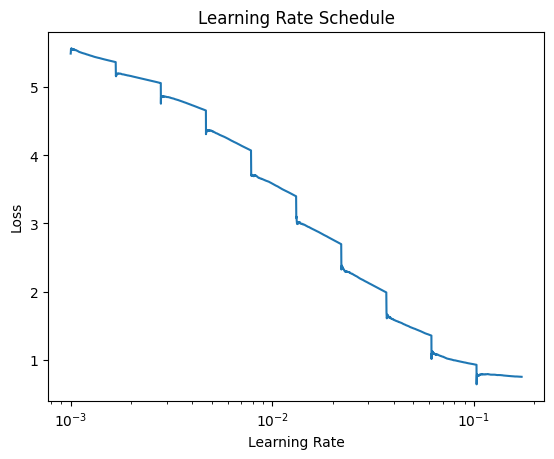

In [94]:
# Wykres funkcji straty w zależności od współczynnika uczenia
plt.plot(lr_scheduler.lrs, lr_scheduler.losses)
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate Schedule')
plt.xscale('log')
plt.show()

#### 5. Ewaluacja:

In [95]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Dokładność: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9073 - loss: 0.5699
Dokładność: 92.33%


## Zadanie do samodzielnego wykonania

Wytrenuj głęboki perceptron wielowarstwowy na zestawie danych MNIST (możesz go wczytać za pomocą funkcji `tf.keras.datasets.mnist.load_data()`). Spróbuj uzyskać dokładność przekraczającą 98% za pomocą ręcznego strojenia hiperparametrów. Postaraj się wyszukać optymalny współczynnik uczenia za pomocą techniki wykładniczego zwiększania wartości współczynnika uczenia w każdej iteracji, utworzenie wykresu funkcji straty i znalezienie punktu, w którym wartość tej funkcji zaczyna rosnąć.